In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


In [ ]:
# Loading dataset
from google.colab import drive
drive.mount('/content/drive/')
mushroom_data=pd.read_csv('mushroom.csv')
mushroom_data

Mounted at /content/drive/


,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [ ]:
print(mushroom_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

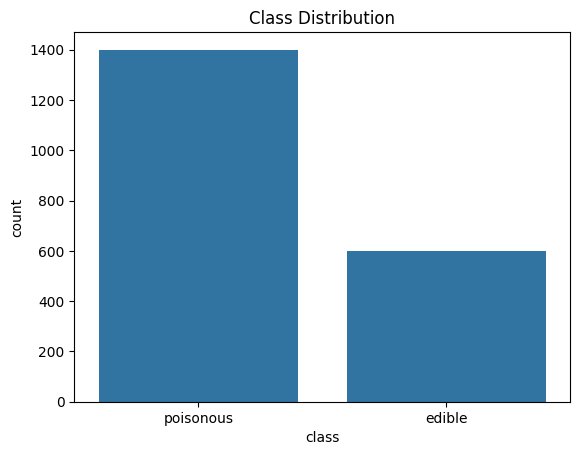

In [ ]:
# Histogram for class distribution
sns.countplot(x='class', data=mushroom_data)
plt.title('Class Distribution')
plt.show()

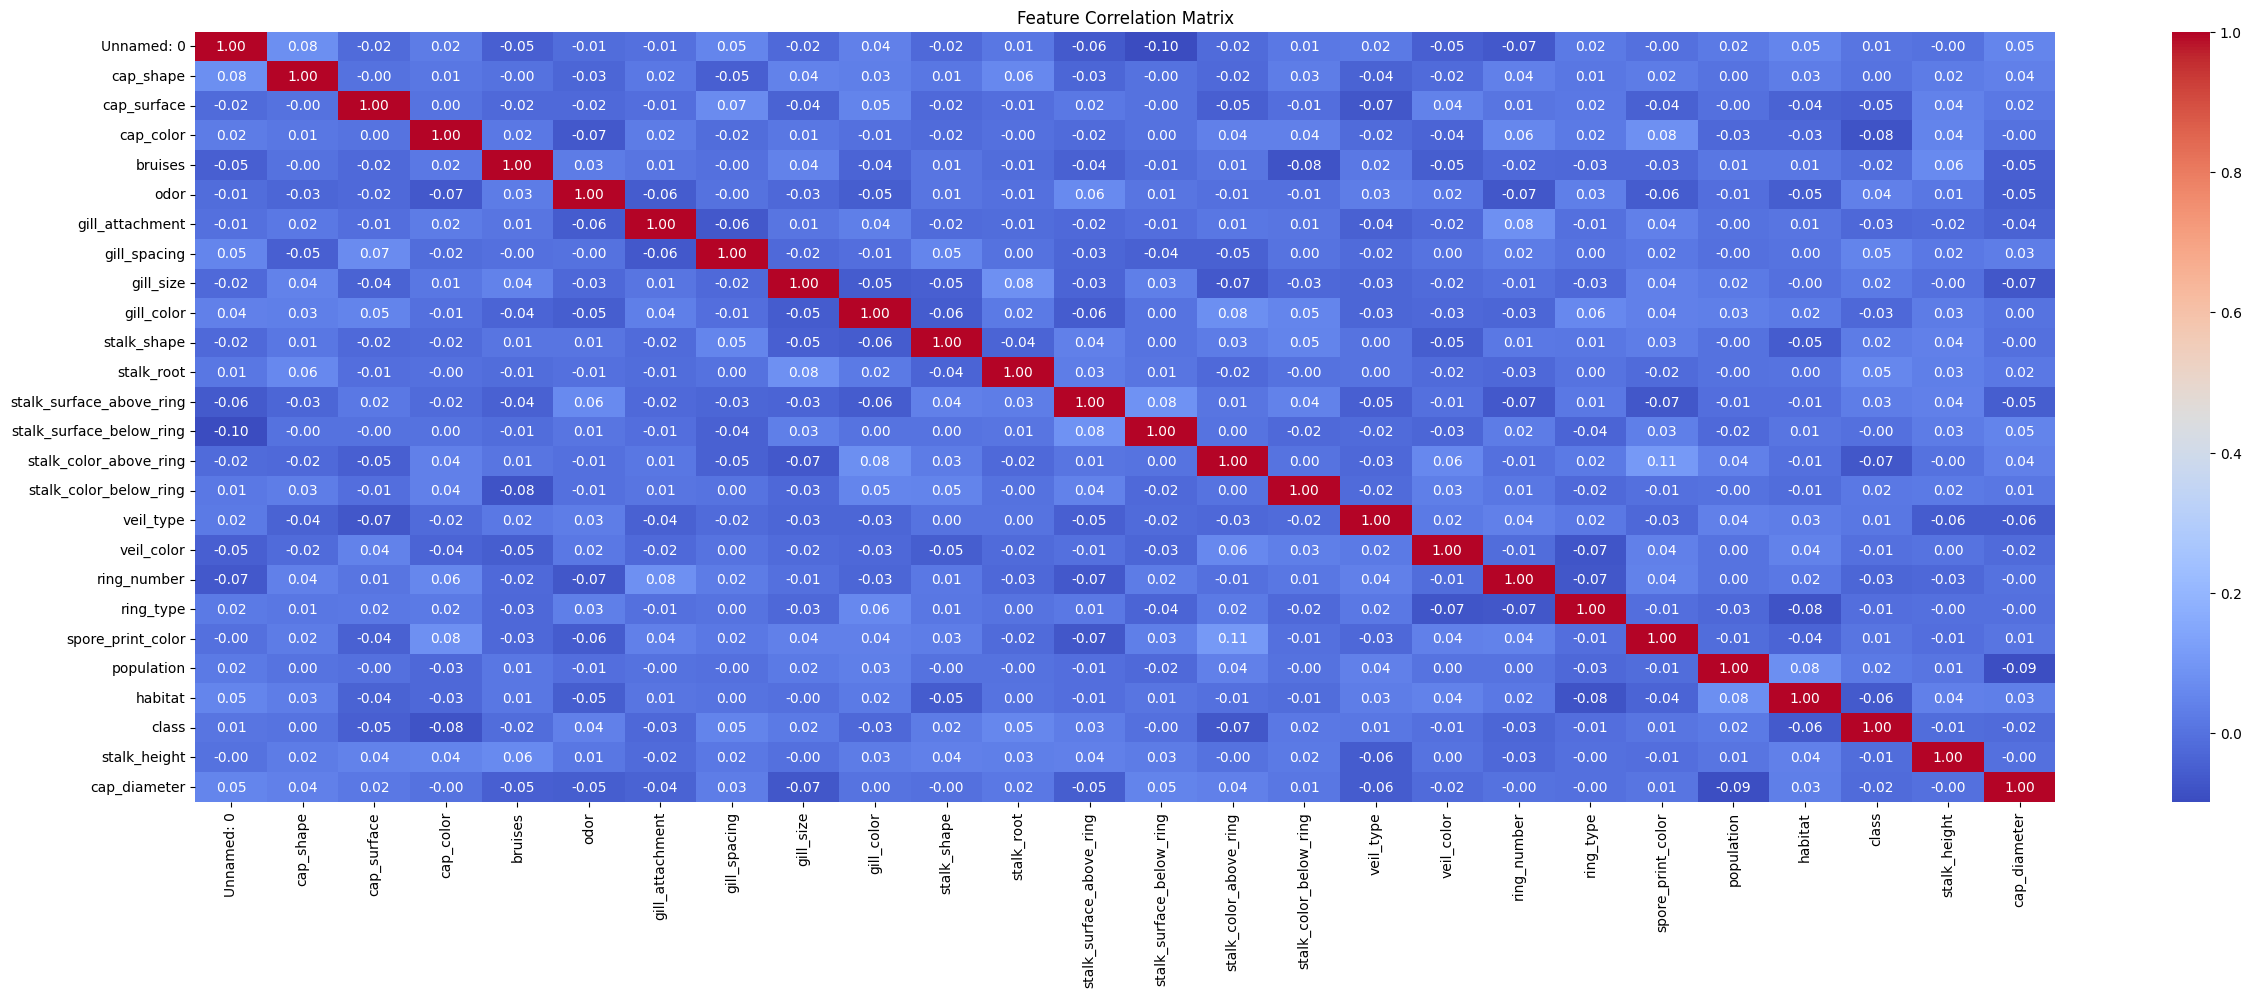

In [ ]:
# Feature correlations
# Convert all non-numeric columns to numeric using LabelEncoder
for column in mushroom_data.columns:
    if mushroom_data[column].dtype == 'object':
        le = LabelEncoder()
        mushroom_data[column] = le.fit_transform(mushroom_data[column])



plt.figure(figsize=(30, 10))
correlation_matrix = mushroom_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

In [ ]:
#Data Preprocessing
# Encode categorical variables
label_encoders = {}
for column in mushroom_data.columns:
    label_encoders[column] = LabelEncoder()
    mushroom_data[column] = label_encoders[column].fit_transform(mushroom_data[column])

# Split dataset into training and testing sets
X = mushroom_data.drop('class', axis=1)
y = mushroom_data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Data Visualization
# Pair plot for feature distributions and relationships
sns.pairplot(mushroom_data, hue='class', diag_kind='kde')
plt.title('Pair Plot')
plt.show()

# Visualize class distributions
sns.countplot(x='class', data=mushroom_data)
plt.title('Class Distribution')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#SVM Implementation
# Implement basic SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Evaluate model performance
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6675
Precision: 0.6675
Recall: 1.0
F1 Score: 0.800599700149925


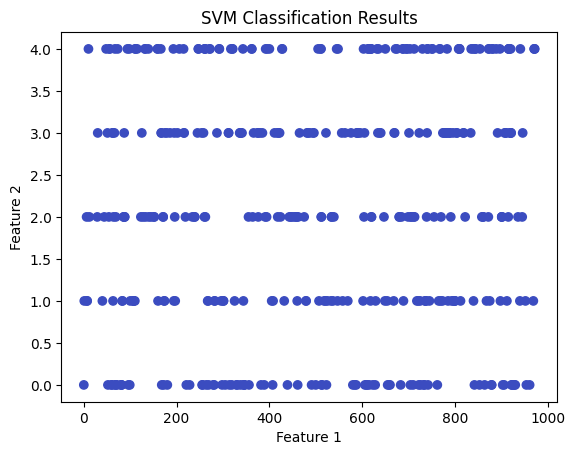

In [ ]:
#Visualization of SVM Results
# Visualize classification results
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred, cmap='coolwarm')
plt.title('SVM Classification Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
#Parameter Tuning and Optimization
# Experiment with different SVM hyperparameters
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')  # Example with RBF kernel
svm_classifier.fit(X_train, y_train)

# Evaluate tuned model
y_pred_tuned = svm_classifier.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)
print("Tuned Model Metrics:")
print("Accuracy:", accuracy_tuned)
print("Precision:", precision_tuned)
print("Recall:", recall_tuned)
print("F1 Score:", f1_tuned)

Tuned Model Metrics:
Accuracy: 0.6675
Precision: 0.6675
Recall: 1.0
F1 Score: 0.800599700149925


In [ ]:
# Compare SVM performance with different kernels
kernels = ['linear', 'poly', 'rbf']
metrics_dict = {}

for kernel in kernels:
    # Train SVM classifier with the specified kernel
    svm_classifier = SVC(kernel=kernel)
    svm_classifier.fit(X_train, y_train)

    # Evaluate performance on testing data
    y_pred = svm_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store metrics
    metrics_dict[kernel] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Print performance metrics for each kernel
print("Performance Metrics for Different Kernels:")
for kernel, metrics in metrics_dict.items():
    print(f"Kernel: {kernel}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()



Performance Metrics for Different Kernels:
Kernel: linear
Accuracy: 0.6675
Precision: 0.6675
Recall: 1.0
F1 Score: 0.800599700149925

Kernel: poly
Accuracy: 0.6675
Precision: 0.6675
Recall: 1.0
F1 Score: 0.800599700149925

Kernel: rbf
Accuracy: 0.6675
Precision: 0.6675
Recall: 1.0
F1 Score: 0.800599700149925



From the above performance metrics, all three SVM classifiers with different kernels (linear, polynomial, and radial basis function - rbf) achieved identical results in terms of accuracy, precision, recall, and F1 score. This suggests that, for this particular dataset the choice of kernel does not significantly impact the performance of the SVM classifier.


However, let's still analyze the strengths and weaknesses of each kernel and discuss practical implications:

**Kernel: Linear**
- Strengths:
 - Computationally efficient, especially for large datasets.
 - Easy to interpret and understand.

- Weaknesses:
 - Assumes linear separability, which may limit its performance on complex, nonlinear datasets.

- Practical Implications:
 - Suitable for datasets with linear separability or when interpretability is important.
 - May not perform well on datasets with complex nonlinear relationships.

**Kernel: Polynomial**
- Strengths:
 - Can capture some degree of nonlinearity by mapping features into higher-dimensional space.

- Weaknesses:
 - Sensitive to the choice of hyperparameters, especially the degree of the polynomial.
 - Prone to overfitting with higher polynomial degrees.

- Practical Implications:
 - Useful for datasets with moderate nonlinearity.
 - Requires careful hyperparameter tuning to prevent overfitting.

**Kernel: Radial Basis Function (RBF)**
- Strengths:
 - Highly flexible kernel that can capture complex nonlinear relationships.
 - No need to specify the explicit mapping function as with polynomial kernel.

- Weaknesses:
 - Computationally intensive, especially with large datasets.
 - Sensitive to the choice of hyperparameters, particularly the regularization parameter (C) and the kernel width (gamma).

- Practical Implications:
 - Effective for datasets with complex nonlinear relationships.
 - Requires careful tuning of hyperparameters to prevent overfitting and achieve optimal performance.


For real-world applications, it's crucial to validate the model's performance on unseen data and considering factors such as interpretability, computational efficiency, and robustness to noise.

performance metrics for all three kernels (linear, polynomial, and radial basis function) are identical.
Lets Experiment with different values of hyperparameters to find the optimal configuration for each kernel.

In [ ]:
# Define simplified parameter distributions for each kernel
param_dist_linear = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
param_dist_poly = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'degree': randint(2, 5)}
param_dist_rbf = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform randomized search for each kernel
svm_linear = RandomizedSearchCV(SVC(kernel='linear'), param_dist_linear, cv=3, n_iter=5)
svm_poly = RandomizedSearchCV(SVC(kernel='poly'), param_dist_poly, cv=3, n_iter=5)
svm_rbf = RandomizedSearchCV(SVC(kernel='rbf'), param_dist_rbf, cv=3, n_iter=5)

# Fit the models
svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

# Get the best hyperparameters and performance metrics
best_params_linear = svm_linear.best_params_
best_score_linear = svm_linear.best_score_

best_params_poly = svm_poly.best_params_
best_score_poly = svm_poly.best_score_

best_params_rbf = svm_rbf.best_params_
best_score_rbf = svm_rbf.best_score_

print("Best Parameters (Linear Kernel):", best_params_linear)
print("Best Accuracy (Linear Kernel):", best_score_linear)

print("Best Parameters (Polynomial Kernel):", best_params_poly)
print("Best Accuracy (Polynomial Kernel):", best_score_poly)

print("Best Parameters (RBF Kernel):", best_params_rbf)
print("Best Accuracy (RBF Kernel):", best_score_rbf)


Best Parameters (Linear Kernel): {'C': 10}
Best Accuracy (Linear Kernel): 0.708125162496223
Best Parameters (Polynomial Kernel): {'C': 0.1, 'degree': 2}
Best Accuracy (Polynomial Kernel): 0.708125162496223
Best Parameters (RBF Kernel): {'gamma': 10, 'C': 10}
Best Accuracy (RBF Kernel): 0.8381197986569321
